In [8]:
from pathlib import Path

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np

In [9]:
# Set the folder path to save the figures to
IMG_FOLDER = Path('img')
plt.style.use('dark_background')
plt.rc('axes', titlesize=22, labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('figure', labelsize=26)
plt.ion()

In [10]:
X, labels = datasets.load_wine(return_X_y=True, as_frame=True)

alcohol = X.alcohol
color_intensity = X.color_intensity

X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


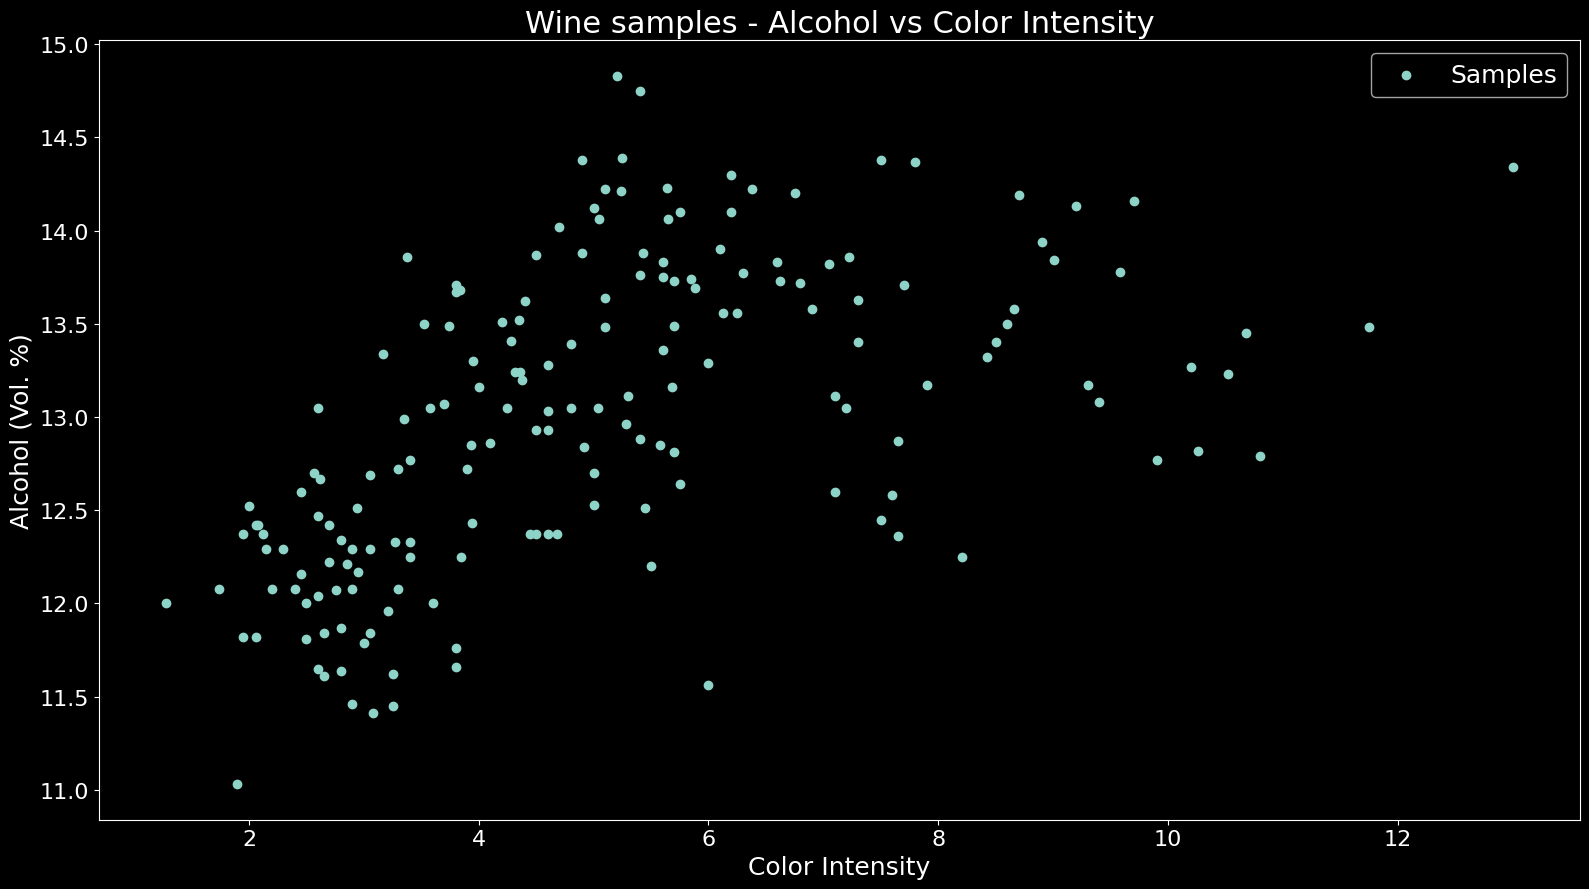

In [11]:
fig, ax = plt.subplots()
# increase figure size
fig.set_size_inches(16, 9)
ax.set_title('Wine samples - Alcohol vs Color Intensity')
ax.set_xlabel('Color Intensity')
ax.set_ylabel('Alcohol (Vol. %)')

ax.scatter(color_intensity, alcohol, label='Samples')

ax.legend()
plt.tight_layout()
plt.savefig(IMG_FOLDER / '01_wine_samples.png', dpi=450)
plt.show()

Optimal a=0.19132798002883114, b=12.032863857596462


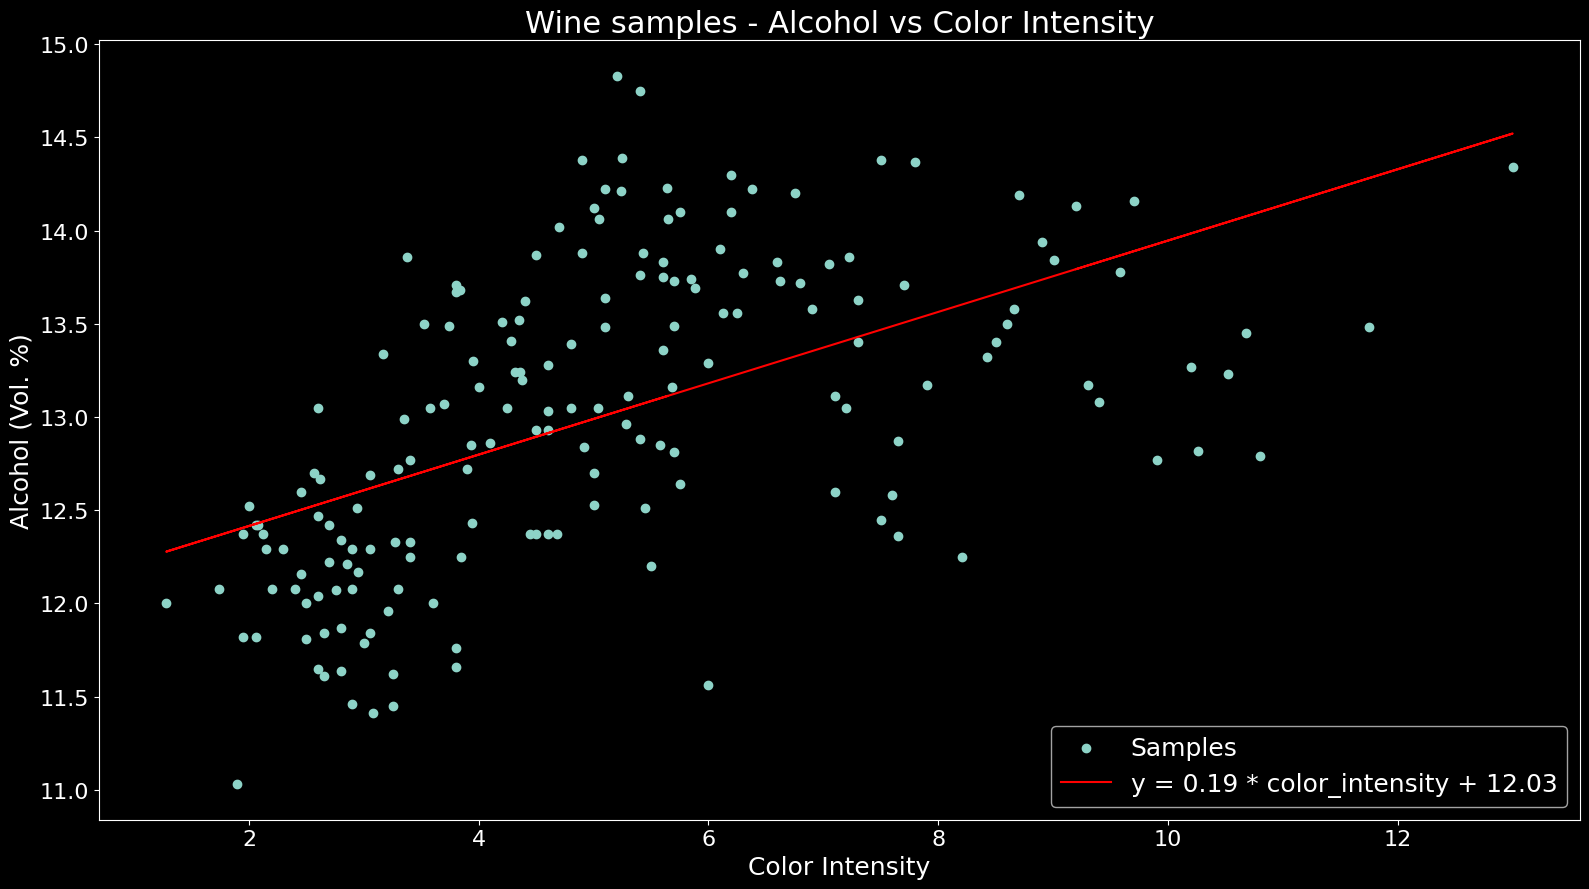

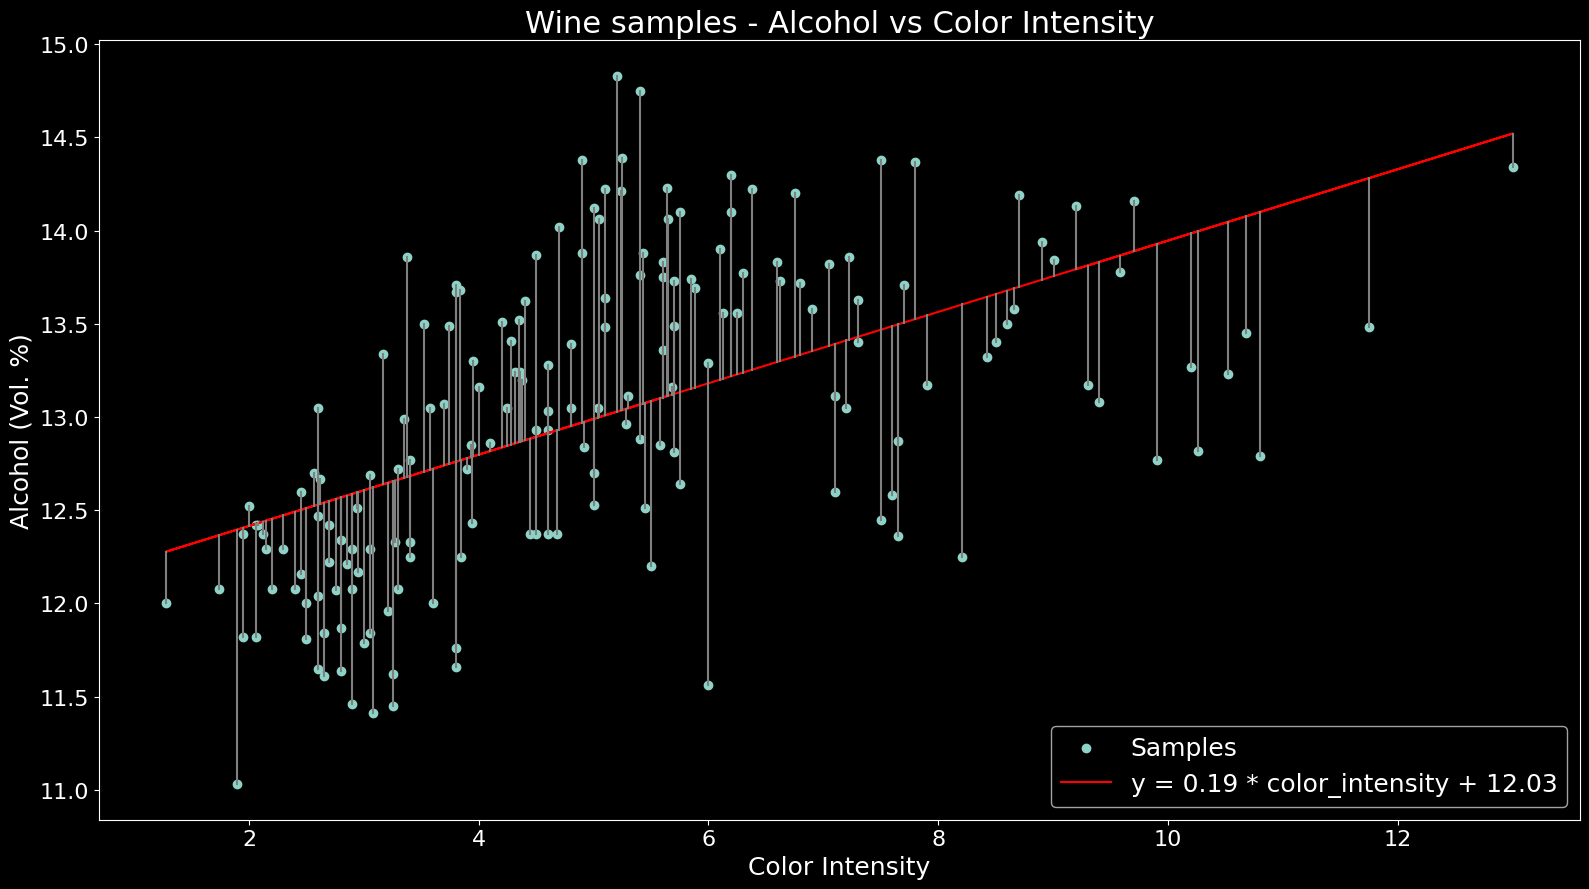

In [12]:
# Add linear regression to the plot

# create a linear regression model
model = LinearRegression()
model.fit(X[['color_intensity']], X['alcohol'])

print(f'Optimal a={model.coef_[0]}, b={model.intercept_}')

alcohol_pred = model.predict(X[['color_intensity']])

# plot the data without error bars
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)

# plot alcohol against color_intensity
ax.set_title('Wine samples - Alcohol vs Color Intensity')
ax.set_xlabel('Color Intensity')
ax.set_ylabel('Alcohol (Vol. %)')

# plot the linear regression line
ax.scatter(color_intensity, alcohol, label='Samples')
ax.plot(color_intensity, alcohol_pred, color='red',
        label=f'y = {model.coef_[0]:.2f} * color_intensity + {model.intercept_:.2f}')

ax.legend()
plt.tight_layout()
plt.savefig(IMG_FOLDER / '02_wine_linear_regression.png')
plt.show()

# plot the data with error bars
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)

# plot alcohol against color_intensity
ax.set_title('Wine samples - Alcohol vs Color Intensity')
ax.set_xlabel('Color Intensity')
ax.set_ylabel('Alcohol (Vol. %)')

# plot the linear regression line
ax.scatter(color_intensity, alcohol, label='Samples')
ax.plot(color_intensity, alcohol_pred, color='red',
        label=f'y = {model.coef_[0]:.2f} * color_intensity + {model.intercept_:.2f}')

# plot the distance between the points and the regression line
for i in range(len(color_intensity)):
    ax.plot([color_intensity[i], color_intensity[i]], [alcohol[i], alcohol_pred[i]], color='gray', linestyle='-')

ax.legend()
plt.tight_layout()
plt.savefig(IMG_FOLDER / '03_wine_linear_regression_error_bars.png', dpi=450)
plt.show()

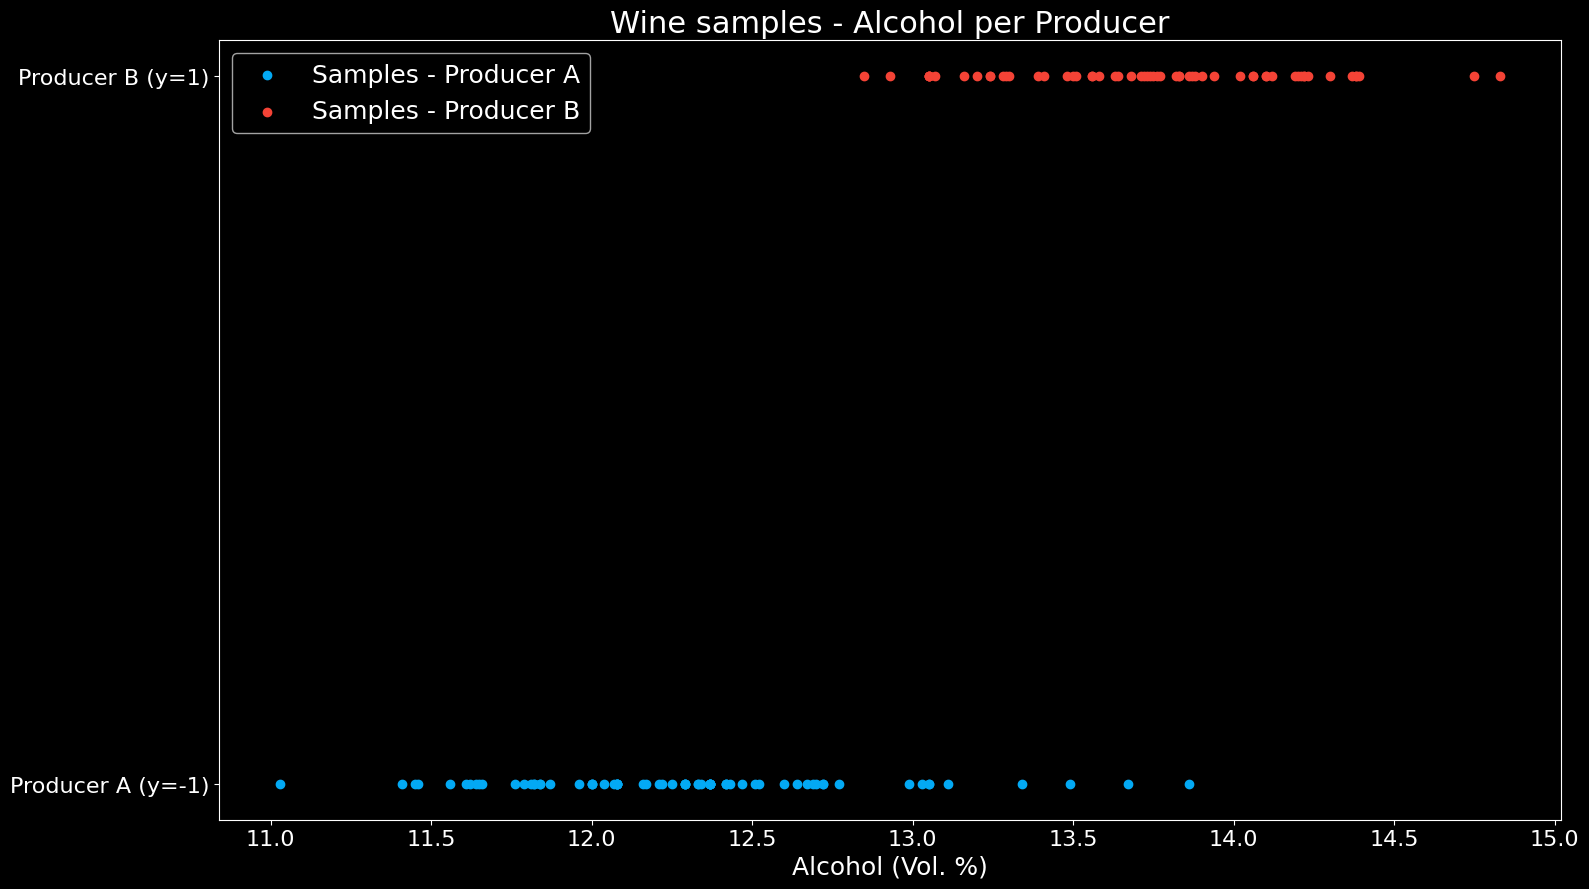

In [13]:
# Classification between Producer 1 and 2 - Dataset visualization

# filter out samples of class 2
X_classification = X[labels != 2]
y_classification = labels[labels != 2]
# reordering with +1 and -1
y_classification[y_classification == 1] = -1
y_classification[y_classification == 0] = 1

sample_order = np.argsort(X_classification[['alcohol']])

cmap = plt.colormaps['RdBu']

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.set_title('Wine samples - Alcohol per Producer')
ax.set_xlabel('Alcohol (Vol. %)')

ax.scatter(X_classification[y_classification == -1]['alcohol'], y_classification[y_classification == -1], c='#03A9F4',
           label="Samples - Producer A")
ax.scatter(X_classification[y_classification == 1]['alcohol'], y_classification[y_classification == 1], c='#F44336',
           label="Samples - Producer B")
ax.set_yticks([-1, 1], ["Producer A (y=-1)", "Producer B (y=1)"])

ax.legend()
plt.tight_layout()
plt.savefig(IMG_FOLDER / '04_wine_classification_dataset.png', dpi=450)
plt.show()

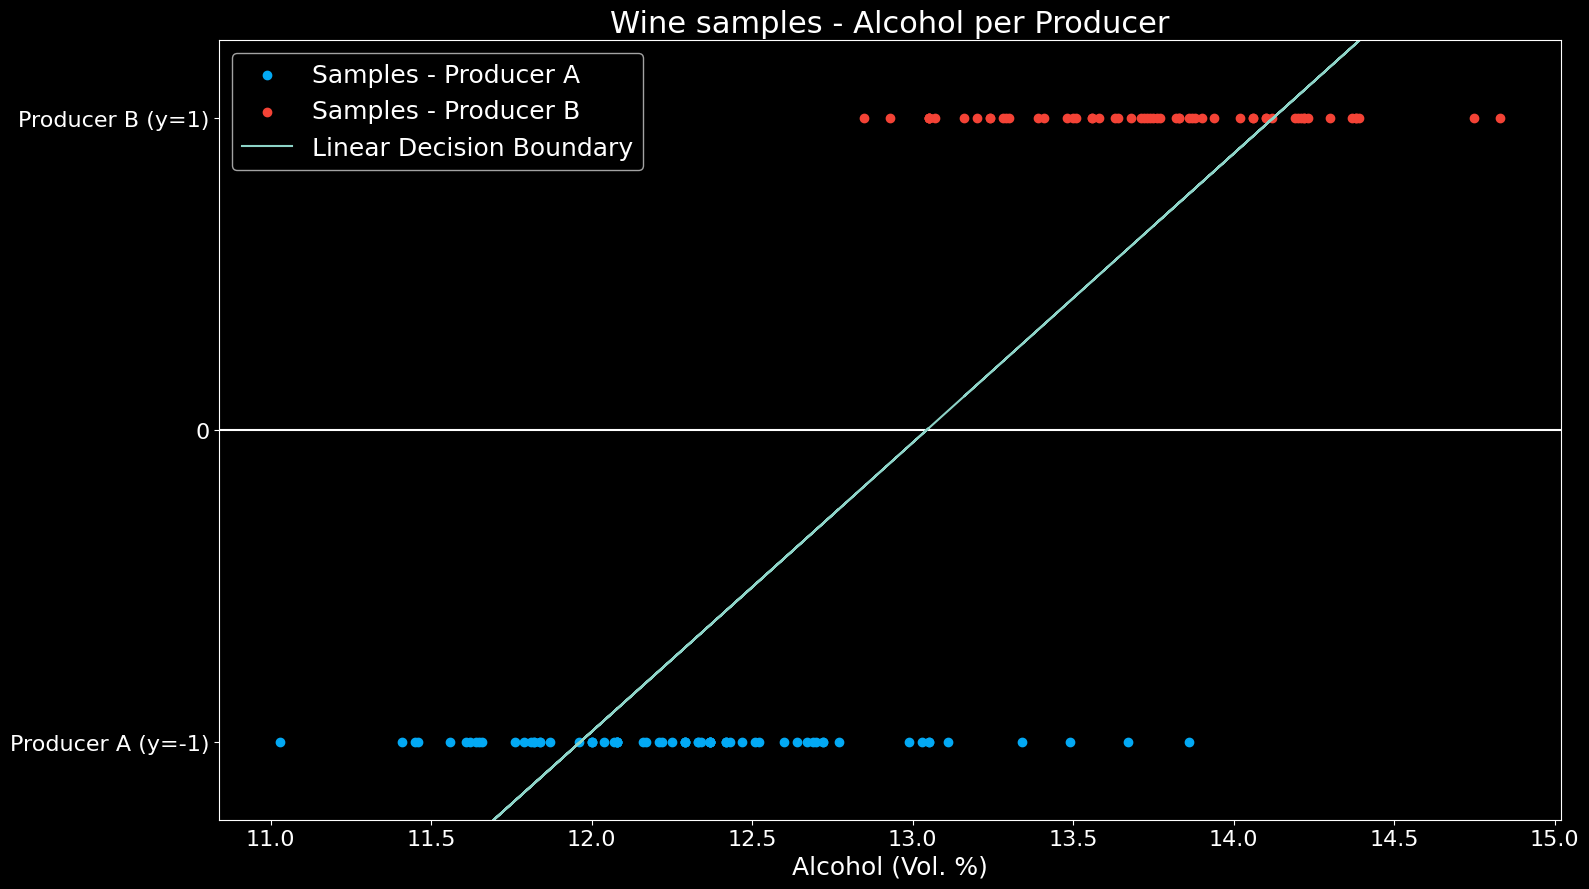

In [14]:
# Classification between Producer 1 and 2 - Linear classifier visualization

# create a linear regression model
model = LinearRegression()
model.fit(X_classification[['alcohol']], y_classification)
y_pred = model.predict(X_classification[['alcohol']])

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.set_title('Wine samples - Alcohol per Producer')
ax.set_xlabel('Alcohol (Vol. %)')

ax.scatter(X_classification[y_classification == -1]['alcohol'], y_classification[y_classification == -1], c='#03A9F4',
           label="Samples - Producer A")
ax.scatter(X_classification[y_classification == 1]['alcohol'], y_classification[y_classification == 1], c='#F44336',
           label="Samples - Producer B")
ax.set_yticks([-1, 0, 1], ["Producer A (y=-1)", "0", "Producer B (y=1)"])
ax.set_ylim(-1.25, 1.25)

ax.axhline(0)

ax.plot(X_classification[['alcohol']], y_pred, label='Linear Decision Boundary')

ax.legend()
plt.tight_layout()
plt.savefig(IMG_FOLDER / '05_wine_classification_linear.png', dpi=450)
plt.show()

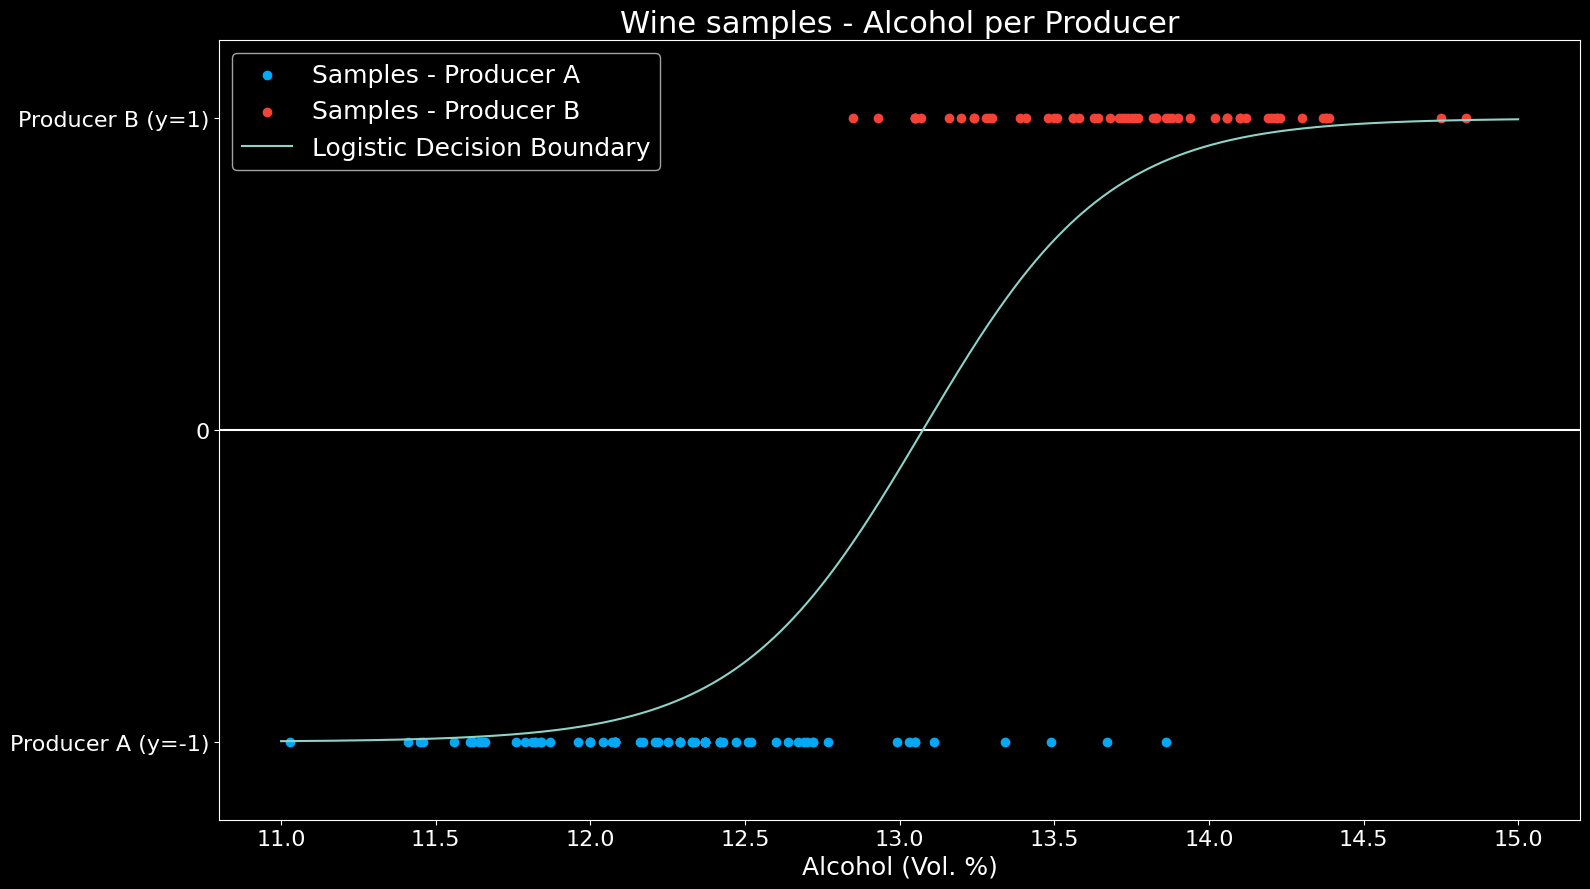

In [15]:
# Classification between Producer 1 and 2 - Logistic classifier visualization

# create a linear regression model
model = LogisticRegression()
model.fit(X_classification[['alcohol']], y_classification)
y_pred = model.predict(X_classification[['alcohol']])

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.set_title('Wine samples - Alcohol per Producer')
ax.set_xlabel('Alcohol (Vol. %)')

ax.scatter(X_classification[y_classification == -1]['alcohol'], y_classification[y_classification == -1], c='#03A9F4',
           label="Samples - Producer A")
ax.scatter(X_classification[y_classification == 1]['alcohol'], y_classification[y_classification == 1], c='#F44336',
           label="Samples - Producer B")
ax.set_yticks([-1, 0, 1], ["Producer A (y=-1)", "0", "Producer B (y=1)"])
ax.set_ylim(-1.25, 1.25)

ax.axhline(0)

a = model.coef_[0]
b = model.intercept_

def logistic_predict(x):
    return np.exp(a*x+b) / (1 + np.exp(a*x+b))

x_range = np.linspace(11, 15, 1000)
y_pred = logistic_predict(x_range)
# adjust for my y axis
y_pred = (y_pred - 0.5) * 2

ax.plot(x_range, y_pred, label='Logistic Decision Boundary')

ax.legend()
plt.tight_layout()
plt.savefig(IMG_FOLDER / '06_wine_classification_logistic.png', dpi=450)
plt.show()


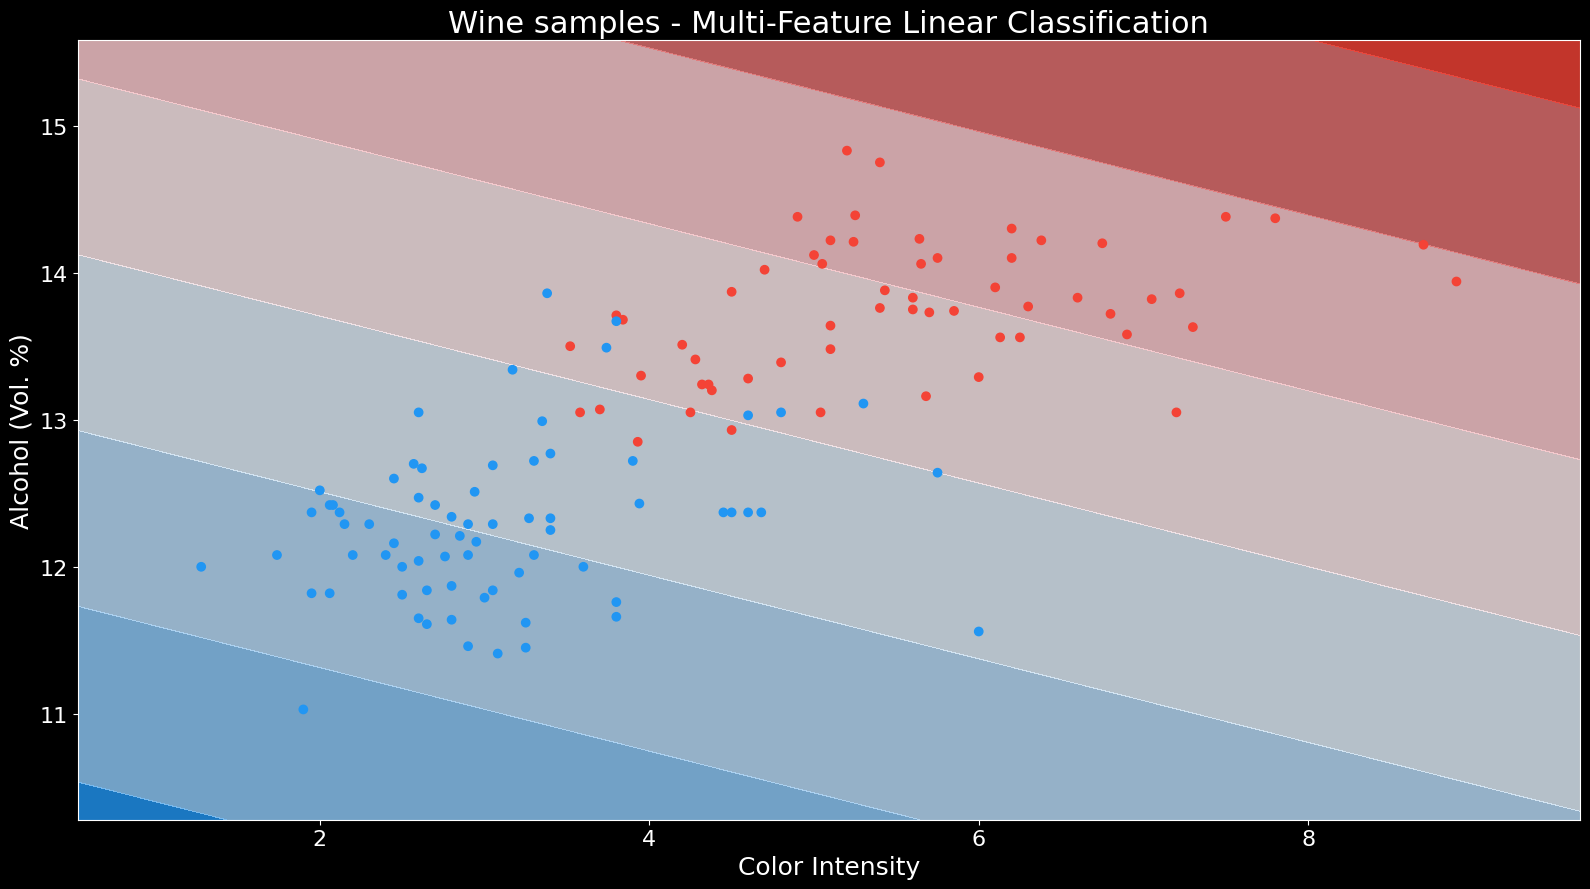

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

# Multidimensional linear classifier
clf = make_pipeline(StandardScaler(), LinearRegression())
clf.fit(X_classification[['color_intensity', 'alcohol']], y_classification)

fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.set_title('Wine samples - Multi-Feature Linear Classification')
ax.set_xlabel('Color Intensity')
ax.set_ylabel('Alcohol (Vol. %)')

cmap_bright = ListedColormap(['#2196F3', '#90CAF9', '#BBDEFB', '#E3F2FD', '#FFEBEE', '#FFCDD2', '#E57373', '#F44336'])

DecisionBoundaryDisplay.from_estimator(clf, X_classification[['color_intensity', 'alcohol']], cmap=cmap_bright,
                                       alpha=0.8, ax=ax, eps=0.75)

ax.scatter(X_classification['color_intensity'], X_classification['alcohol'], c=y_classification, cmap=cmap_bright)

plt.tight_layout()
plt.savefig(IMG_FOLDER / '07_wine_classification_2d.png', dpi=450)
plt.show()

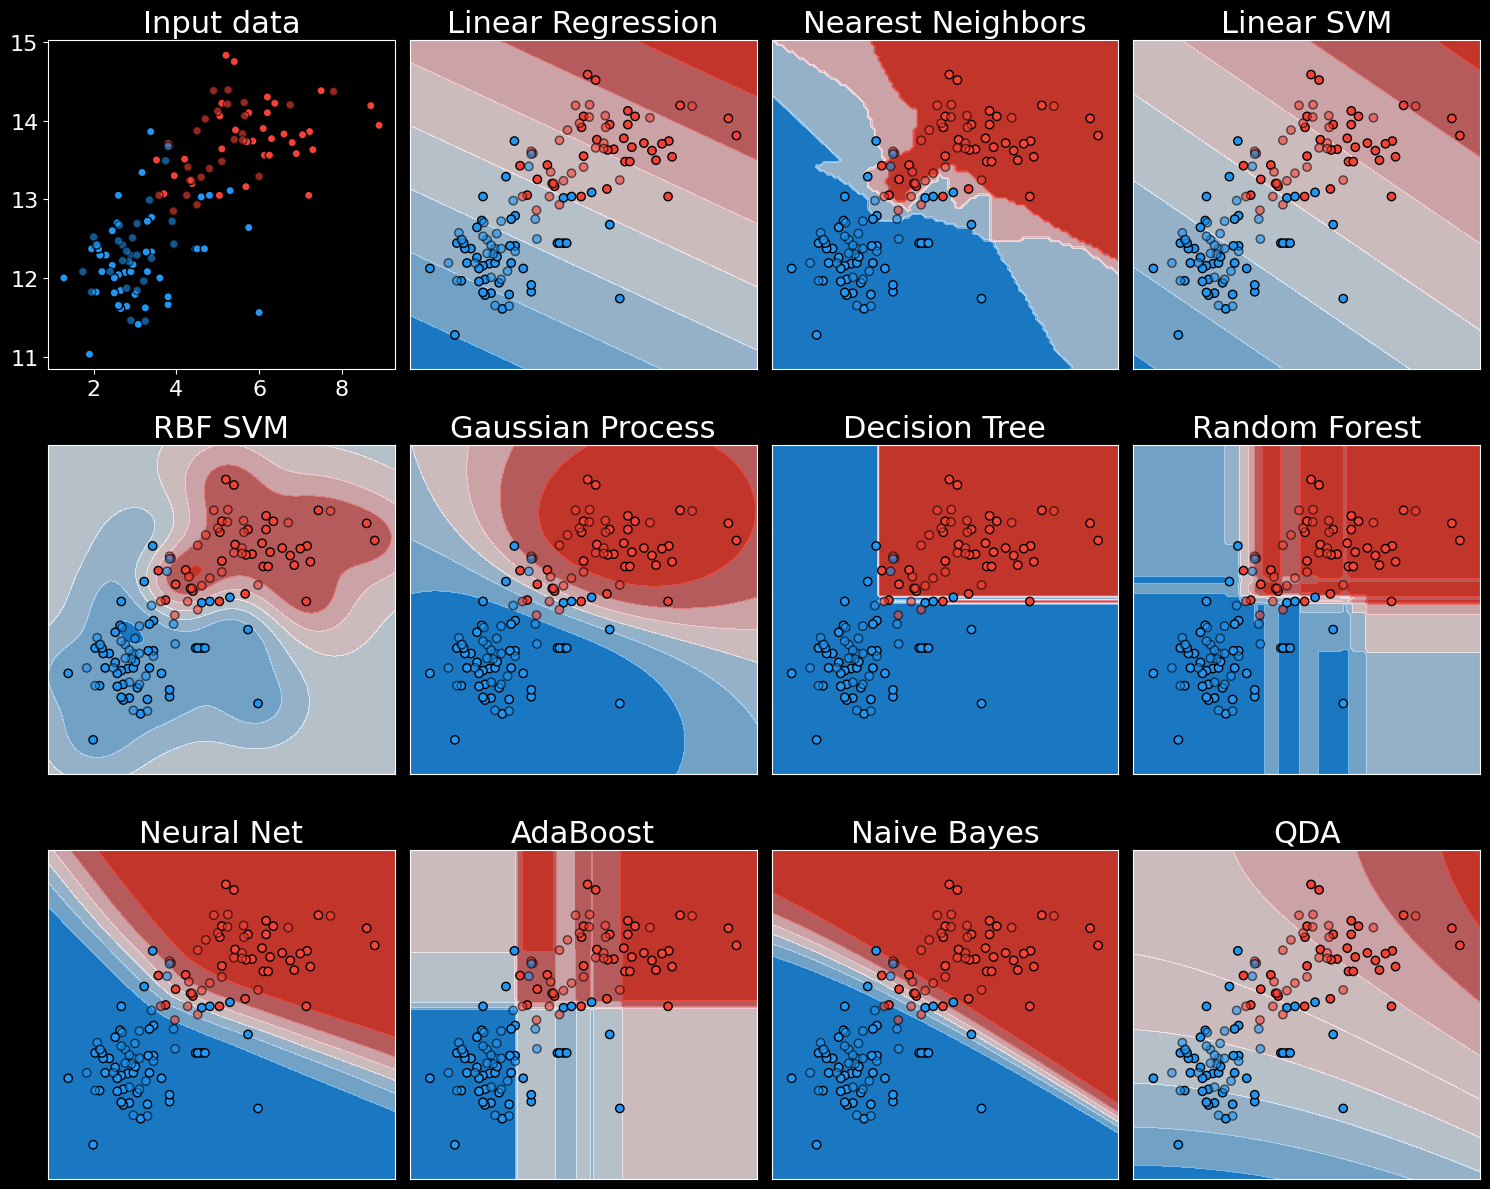

In [17]:
# Different classifiers visualized
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Linear Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    LinearRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=0, max_iter=1000, random_state=555),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
fig, axes = plt.subplots(3, 4, figsize=(15, 12))

X_train, X_test, y_train, y_test = train_test_split(
    X_classification[['color_intensity', 'alcohol']].to_numpy(), y_classification.to_numpy(), test_size=0.4, random_state=100,
    shuffle=True
)
x_min, x_max = 11 - 0.5, 15 + 0.5
y_min, y_max = 0.75, 10
ax = axes[0][0]
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bright, alpha=0.6, edgecolors="k"
)
i = 1
for name, clf in zip(names, classifiers):
    ax = axes[i // 4][i % 4]
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X_classification[['color_intensity', 'alcohol']].to_numpy(), cmap=cmap_bright, alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points
    ax.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cmap_bright,
        edgecolors="k",
        alpha=0.6,
    )
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1

plt.tight_layout()
plt.savefig(IMG_FOLDER / "08_wine_classification_comparison.png", dpi=450)
plt.show()

In [18]:
# Computing absolute loss for some specific different a/b combinations

for a in (0., 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.30):
    for b in (0., 3, 6, 9, 12, 15):
        y_pred = a * color_intensity + b
        abs_loss = np.abs(y_pred - alcohol).sum()
        print(f'a={a},b={b} loss={abs_loss}')

a=0.0,b=0.0 loss=2314.11
a=0.0,b=3 loss=1780.1100000000001
a=0.0,b=6 loss=1246.1100000000001
a=0.0,b=9 loss=712.1100000000001
a=0.0,b=12 loss=190.91
a=0.0,b=15 loss=355.8900000000001
a=0.03,b=0.0 loss=2287.09980003
a=0.03,b=3 loss=1753.09980003
a=0.03,b=6 loss=1219.09980003
a=0.03,b=9 loss=685.09980003
a=0.03,b=12 loss=167.93120003
a=0.03,b=15 loss=382.90019997
a=0.06,b=0.0 loss=2260.08960006
a=0.06,b=3 loss=1726.08960006
a=0.06,b=6 loss=1192.08960006
a=0.06,b=9 loss=658.0896000600001
a=0.06,b=12 loss=146.73040006
a=0.06,b=15 loss=409.91039994
a=0.09,b=0.0 loss=2233.0794000900005
a=0.09,b=3 loss=1699.07940009
a=0.09,b=6 loss=1165.07940009
a=0.09,b=9 loss=631.07940009
a=0.09,b=12 loss=128.56579991
a=0.09,b=15 loss=436.92059990999996
a=0.12,b=0.0 loss=2206.06920012
a=0.12,b=3 loss=1672.06920012
a=0.12,b=6 loss=1138.06920012
a=0.12,b=9 loss=604.06920012
a=0.12,b=12 loss=114.58359988000001
a=0.12,b=15 loss=463.93079988
a=0.15,b=0.0 loss=2179.0590001500004
a=0.15,b=3 loss=1645.05900015
a=0.

/tmp/ipykernel_25842/383007356.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


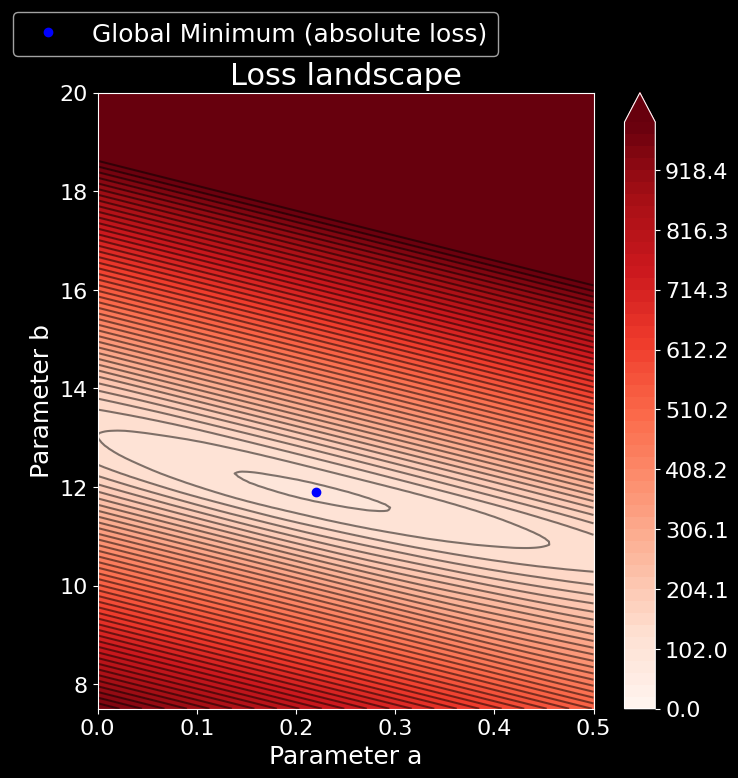

In [24]:
from matplotlib.colors import LogNorm
from matplotlib import cm
# Plotting the loss-landscape

def loss(coeff, offset):
    pred = coeff * color_intensity + offset
    return np.abs(pred - alcohol).sum()


A_3d = np.linspace(0, 0.5, 200)
B_3d = np.linspace(7.5, 20, 200)
Z_3d = np.zeros((A_3d.size, B_3d.size), dtype=np.float32)

for x in range(0, A_3d.size):
    for y in range(0, B_3d.size):
        l = loss(A_3d[x], B_3d[y])
        # print(f'a={A_3d[x]},b={B_3d[y]} loss={l}')
        Z_3d[y,x] = l

fig, ax = plt.subplots()
# increase figure size
fig.set_size_inches(8, 8)
ax.set_title('Loss landscape')
ax.set_xlabel('Parameter a')
ax.set_ylabel('Parameter b')

contour_levels = np.linspace(0, 1000, 50)

surface = ax.contourf(A_3d, B_3d, Z_3d, cmap=cm.Reds, levels=contour_levels, extend='max')
outlines = ax.contour(A_3d, B_3d, Z_3d, colors='#000000', levels=contour_levels, extend='max', alpha=0.5)
# ax.plot(0.19132798002883114, 12.032863857596462, 'go', label='Previous model (squared loss)')
ax.plot(0.22, 11.9, 'bo', label='Global Minimum (absolute loss)')
fig.colorbar(surface)

fig.legend(loc='upper left')
fig.savefig(IMG_FOLDER / '09_loss_contour.png', dpi=450)
fig.show()
